# Test esame 2023

Implementare una libreria che gen random number secondo una dist di Cauchy, in intervall simmetrico attorno M, METODO TAC
Parametri di ingresso f_cauchy: M e $\Gamma$ e la semilarghezza dell'intervallo di generazione

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import cauchy
import random 
from math import ceil, floor


def f_cauchy(M,Gamma):
    return 1/np.pi*Gamma/((M**2+Gamma**2))

###Generate a list of N random number according to the TAC method###
def TAC_range_list(f,xMin: float, xMax: float, yMax: float,N: int,seed: float = 0.)-> list[float]:
    if seed!=0. : random.seed(float(seed))
    randlist = []
    for i in range(N):
        x = random.uniform(xMin,xMax)
        y = random.uniform(0,yMax)
        while ( y > f(x) ):
            x = random.uniform(xMin,xMax)
            y = random.uniform(0,yMax)
        randlist.append(x)
    return randlist

def sturges(sample:list)->int:
    return int(np.ceil(1+3.322 * np.log(len(sample))))



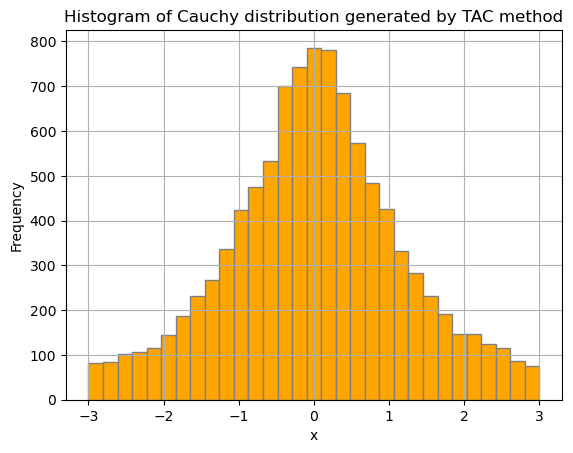

In [44]:
N = 10000
M = 0
Gamma = 1
xMin = M - 3*Gamma
xMax = M + 3*Gamma


sample = TAC_range_list(lambda x: f_cauchy(x,Gamma),xMin,xMax,1,N)
sample = np.array(sample)

N_bins =  sturges(sample)
xMin= floor(min(sample))
xMax= ceil(max(sample))
bin_edges = np.linspace(xMin,xMax,N_bins)

fig, ax = plt.subplots(nrows=1,ncols=1)
plt.hist(sample,bins=bin_edges,color="orange",label="TAC method generated sample",edgecolor="grey")
plt.title("Histogram of Cauchy distribution generated by TAC method")
plt.xlabel("x")
plt.ylabel("Frequency")
plt.grid()
plt.show()


<>:25: SyntaxWarning: invalid escape sequence '\G'
<>:30: SyntaxWarning: invalid escape sequence '\G'
<>:25: SyntaxWarning: invalid escape sequence '\G'
<>:30: SyntaxWarning: invalid escape sequence '\G'
C:\Users\franc\AppData\Local\Temp\ipykernel_4164\4085407385.py:25: SyntaxWarning: invalid escape sequence '\G'
  axs[0].set_xlabel('$i\Gamma$')
C:\Users\franc\AppData\Local\Temp\ipykernel_4164\4085407385.py:30: SyntaxWarning: invalid escape sequence '\G'
  axs[1].set_xlabel('$i\Gamma$')


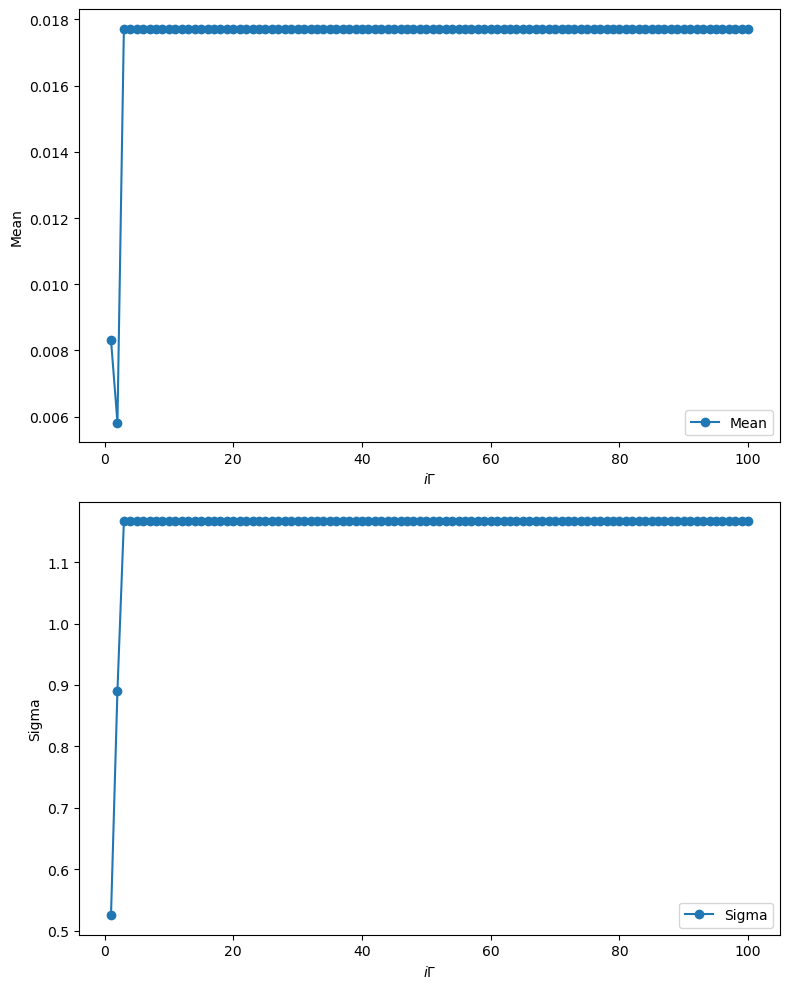

In [49]:
def calculate_mean_sigma(data, M, Gamma):
    iGammas = np.arange(1, 101, dtype=int)
    means = []
    sigmas = []

    for i in iGammas:
        interval_data = data[(data > M - i * Gamma) & (data < M + i * Gamma)]
        means.append(np.mean(interval_data))
        sigmas.append(np.std(interval_data))

    return iGammas, means, sigmas

# Esempio d'uso:
M = 0
Gamma = 1
N = 10000

iGammas, means, sigmas = calculate_mean_sigma(sample, M, Gamma)

# Grafico della media e sigma in funzione di iGamma
def plot_mean_sigma(iGammas, means, sigmas):
    fig, axs = plt.subplots(2, 1, figsize=(8, 10))

    axs[0].plot(iGammas, means, 'o-', label='Mean')
    axs[0].set_xlabel('$i\Gamma$')
    axs[0].set_ylabel('Mean')
    axs[0].legend()

    axs[1].plot(iGammas, sigmas, 'o-', label='Sigma')
    axs[1].set_xlabel('$i\Gamma$')
    axs[1].set_ylabel('Sigma')
    axs[1].legend()

    plt.tight_layout()
    plt.savefig('mean_sigma.png')
    plt.show()

plot_mean_sigma(iGammas, means, sigmas)


# Altro esame 2023 TEST BONTA' FIT

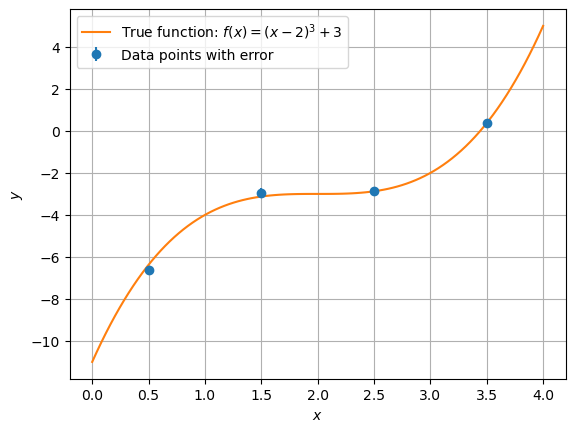

In [55]:
def f(x):
    return (x-2)**3 - 3

x_values = np.array([0.5,1.5,2.5,3.5])
sigma = 0.2
y_values = f(x_values) + np.random.normal(0,sigma,len(x_values))

plt.errorbar(x_values, y_values, yerr=sigma, fmt='o', label='Data points with error')
plt.plot(np.linspace(0, 4, 100), f(np.linspace(0, 4, 100)), label='True function: $f(x) = (x - 2)^3 + 3$')
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.legend()
plt.grid(True)
plt.savefig('data_points.png')
plt.show()


In [60]:
# fit 
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from iminuit import Minuit
from iminuit.cost import LeastSquares
from scipy.stats import chi2

def model(x,p0,p1):
    return (x-p0)**3 + p1

least_squares = LeastSquares(x_values, y_values, sigma, model)
m = Minuit(least_squares, p0 =2 , p1=3)
m.migrad()
m.hesse()
m.minos()
display(m)

# printing formatted results for checking fit quality Q2,dof,pvalue
for par, val, err in zip(m.parameters, m.values, m.errors):
    print(f'{par} = {val:.3f} ± {err:.3f}') 

print(f'Goodness of the fit: {m.valid}')
print(f'Minuit Q2: {m.fval:.3f}')
print (f'Associated p-value: {1. - chi2.cdf(m.fval, df = m.ndof):.3f}')


┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 1.155 (χ²/ndof = 0.6)      │              Nfcn = 92               │
│ EDM = 2.27e-07 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ p0   │   2.037   │   0.034   │   -0.034   │   0.034    │         │         │       │
│ 1 │ p1   │   -2.87   │   0.16    │   -0.16    │    0.16    │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌──────────┬───────────────────────┬───────────────────────┐
│          │          p0           │          p1           │
├──────────┼───────────┬───────────┼───────────┬───────────┤
│  Error   │  -0.034   │   0.034   │   -0.16   │   0.16    │
│  Valid   │   True    │   True    │   True    │   True    │
│ At Limit │   False   │   False   │   False   │   False   │
│ Max FCN  │   False   │   False   │   False   │   False   │
│ New Min  │   False   │   False   │   False   │   False   │
└──────────┴───────────┴───────────┴───────────┴───────────┘
┌────┬─────────────────┐
│    │      p0      p1 │
├────┼─────────────────┤
│ p0 │ 0.00115  0.0043 │
│ p1 │  0.0043  0.0263 │
└────┴─────────────────┘

p0 = 2.037 ± 0.034
p1 = -2.871 ± 0.162
Goodness of the fit: True
Minuit Q2: 1.155
Associated p-value: 0.561


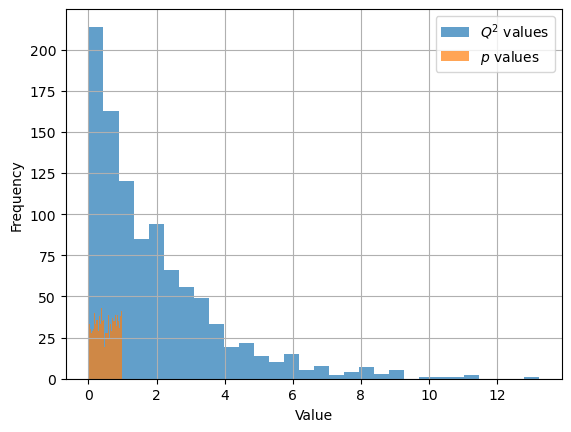

In [64]:
def gen_y(x_values,sigma,p0,p1):
    return model(x_values,p0,p1) + np.random.normal(0,sigma,len(x_values))




N_toys = 1000
Q_2_values = []
p_values = []

for i in range(N_toys):
    y_toy = gen_y(x_values,sigma,2,3)
    lest_squares_toy = LeastSquares(x_values, y_toy, sigma, model)
    m_toy = Minuit(lest_squares_toy, p0 =2 , p1=3)
    m_toy.migrad()
    m_toy.hesse()
    m_toy.minos()
    Q_2_values.append(m_toy.fval)
    p_values.append(1. - chi2.cdf(m_toy.fval, df = m_toy.ndof))


plt.hist(Q_2_values, bins=30, alpha=0.7, label='$Q^2$ values')
plt.hist(p_values, bins=30, alpha=0.7, label='$p$ values')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.savefig('toy_experiments.png')
plt.show()

# Test 2024

In [71]:
import math

def pdf(x):
    if x < 0 or x > 1.5*np.pi:
        return 0
    else:
        return np.cos(x)**2

In [77]:
###Generate one random number distributed uniformly between given range###
def uniform_range(xMin: float, xMax: float)->float:
    return xMin + random.random() * (xMax-xMin)

# ---- ---- ---- ---- ---- ---- ---- ---- ---- ---- ---- ---- ----
###Generate a list of N random number distr uniformly between given range###
def uniform_range_list(xMin: float, xMax: float,N: int, seed: float=0.)-> list[float]:
    if seed!=0. : random.seed(float(seed))
    randlist = []
    for i in range(N):
        randlist.append(uniform_range(xMin,xMax))
    return randlist

# ---- ---- ---- ---- ---- ---- ---- ---- ---- ---- ---- ---- ----
#Calc of a definite integral of function f with hit or miss method, f must be positive and continuos in the definite interval###
def HOM_integration (f, xMin: float, xMax: float, yMax: float, N: int=10000, seed: float=0.) ->tuple[float,float]:
    if xMin>xMax:
        raise ValueError('Error: xMin has to be smaller than xMax')
    if xMin == xMax:
        return 0.,0.
    if seed!=0.: 
        random.seed(float(seed))
        
    x_coord = uniform_range_list(xMin,xMax,N)
    y_coord = uniform_range_list(0,yMax,N)
    points_under = 0.
    
    for x,y in zip(x_coord,y_coord):
        if ( f(x) >= y):
            points_under+=1

    area_rett = (xMax-xMin) * yMax
    fraction = float(points_under)/ float (N)
    integral_value = area_rett * fraction
    integral_uncertainty = area_rett**2 * fraction * (1-fraction) / N
    return integral_value, math.sqrt(integral_uncertainty)


risultato,incertezza = HOM_integration(pdf,0,1.5*np.pi,1,10000)
print(f"Risultato: {risultato:.3f} +- {incertezza:.3f}")




def normalized_pdf(x):
    if (0 < x < 1.5*np.pi):
        return (np.cos(x)**2)/risultato
    else:
        return 0
    
    
risultato_normalizzato, incertezza_normalizzata = HOM_integration(normalized_pdf,0,1.5*np.pi,1,10000)
print(f"Risultato normalizzato: {risultato_normalizzato:.3f} +- {incertezza_normalizzata:.3f}")

Risultato: 2.384 +- 0.024
Risultato normalizzato: 0.968 +- 0.019


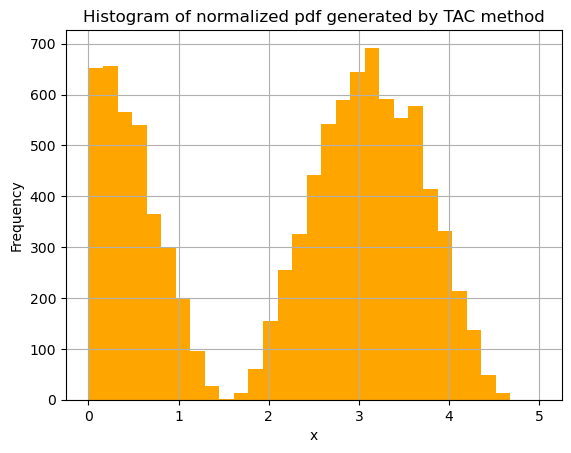

In [80]:
###Generate a list of N random number according to the TAC method###
def TAC_range_list(f,xMin: float, xMax: float, yMax: float,N: int,seed: float = 0.)-> list[float]:
    if seed!=0. : random.seed(float(seed))
    randlist = []
    for i in range(N):
        x = random.uniform(xMin,xMax)
        y = random.uniform(0,yMax)
        while ( y > f(x) ):
            x = random.uniform(xMin,xMax)
            y = random.uniform(0,yMax)
        randlist.append(x)
    return randlist


sample = TAC_range_list(normalized_pdf,0,1.5*np.pi,1,10000)

N_bins = sturges(sample)
xMin= floor(min(sample))
xMax= ceil(max(sample))
bin_edges = np.linspace(xMin,xMax,N_bins)

fig, ax = plt.subplots(nrows=1,ncols=1)
plt.hist(sample,bins=bin_edges,color="orange",label="TAC method generated sample")
plt.title("Histogram of normalized pdf generated by TAC method")
plt.xlabel("x")
plt.ylabel("Frequency")
plt.grid()
plt.show()


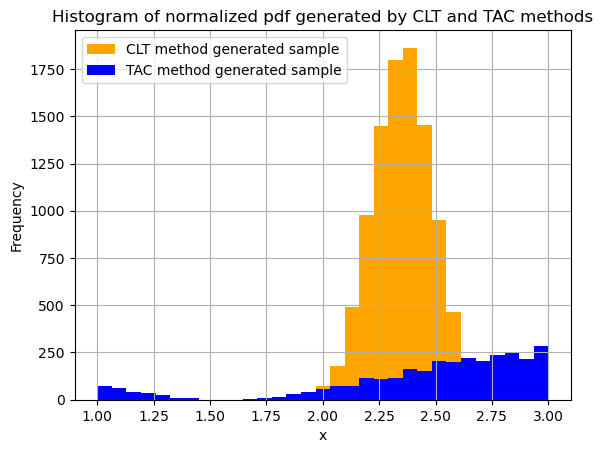

In [87]:
###Generate a list on N number according to CLT on a given interval###

def CLT_range_list(xMin: float, xMax: float,N: int, N_sum: int=100,seed: float=0.) ->list[float]:
    if seed!=0. : random.seed(float(seed))
    randlist = []
    for i in range(N):
        randlist.append(CLT_range(xMin,xMax,N_sum))
    return randlist

###Generate a random number according to the CLT on a given interval###
def CLT_range(xMin: float,xMax: float,N_sum: int=100) ->float:
    y = 0.
    for i in range(N_sum):
        y = y+ uniform_range(xMin,xMax)
    y /= N_sum
    return y 



sample_clt = CLT_range_list(0,1.5*np.pi,10000,100)

N_bins = sturges(sample_clt)
xMin= floor(min(sample_clt))
xMax= ceil(max(sample_clt))
bin_edges = np.linspace(xMin,xMax,N_bins)

fig, ax = plt.subplots(nrows=1,ncols=1)
plt.hist(sample_clt,bins=bin_edges,color="orange",label="CLT method generated sample")
plt.hist(sample,bins=bin_edges,color="blue",label="TAC method generated sample")
plt.title("Histogram of normalized pdf generated by CLT and TAC methods")
plt.xlabel("x")
plt.ylabel("Frequency")
plt.grid()
plt.legend()
plt.show()



In [92]:
# fitting a gaussian to my clt generated sample BINNED
from iminuit import Minuit
from iminuit.cost import BinnedNLL
from scipy.stats import norm, chi2, expon


def model_cdf(bin_edges, mu, sigma):
    return norm.cdf(bin_edges,mu,sigma)

bin_content, bin_edges = np.histogram(sample_clt, bins = N_bins, range=(xMin,xMax))


least_squares = BinnedNLL(bin_content, bin_edges, model_cdf)
m = Minuit(least_squares, mu = 1 , sigma=1)
m.migrad()
m.hesse()
m.minos()
display(m)


for key in m.parameters:
    print(f'{key} = {m.values[key]:.3f} ± {m.errors[key]:.3f}')
    
p_value = 1. - chi2.cdf(m.fval, df = m.ndof)
print(f'Goodness of the fit: {m.valid}')
print(f"p-value: {p_value:.3f}")  
if p_value < 0.05:
    print("The fit is not good")
else:
    print("The fit is good")




┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 10.75 (χ²/ndof = 0.4)      │              Nfcn = 224              │
│ EDM = 4.35e-09 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬───────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name  │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼───────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ mu    │  2.3545   │  0.0014   │  -0.0014   │   0.0014   │         │         │       │
│ 1 │ sigma │ 135.8e-3  │  1.0e-3   │  -1.0e-3   │   1.0e-3   │         │         │       │
└───┴───────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌──────────┬───────────────────────┬───────────────────────┐
│          │          mu           │         sigma         │
├──────────┼───────────┬───────────┼───────────┬───────────┤
│  Error   │  -0.0014  │  0.0014   │   -1e-3   │   1e-3    │
│  Valid   │   True    │   True    │   True    │   True    │
│ At Limit │   False   │   False   │   False   │   False   │
│ Max FCN  │   False   │   False   │   False   │   False   │
│ New Min  │   False   │   False   │   False   │   False   │
└──────────┴───────────┴───────────┴───────────┴───────────┘
┌───────┬───────────────────┐
│       │       mu    sigma │
├───────┼───────────────────┤
│    mu │ 1.88e-06       -0 │
│ sigma │       -0 9.55e-07 │
└───────┴───────────────────┘

mu = 2.355 ± 0.001
sigma = 0.136 ± 0.001
Goodness of the fit: True
p-value: 1.000
The fit is good
